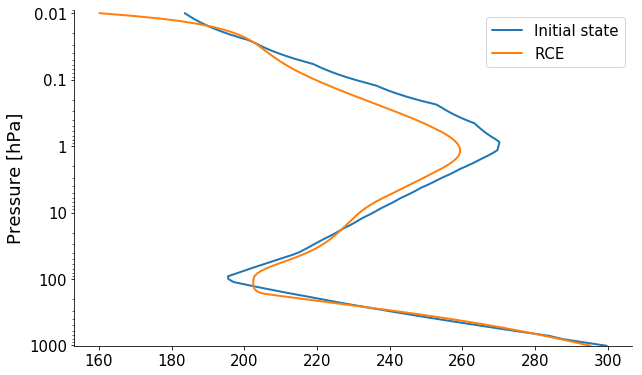

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from typhon import plots

import konrad


# Load a standard atmosphere.
atmosphere = konrad.atmosphere.Atmosphere.from_netcdf(
    ncfile='data/tropical-standard.nc',
)
atmosphere.tracegases_rcemip()  # Atmosphere composition according to RCEMIP.

# Plot the initial temperature profile (for comparison).
plt.style.use(plots.styles('typhon'))
fig, ax = plt.subplots()
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='Initial state')

# Initialize the setup for the radiative-convective equilibrium simulation.
rce = konrad.RCE(
    atmosphere,
    radiation=konrad.radiation.RRTMG(mcica=True),  # Use RRTMG radiation scheme.
    convection=konrad.convection.HardAdjustment(),  # Perform a hard convective adjustment.
    lapserate=konrad.lapserate.MoistLapseRate(),  # Adjust towards a moist adiabat.
    timestep='16h',  # Set timestep in model time.
    max_duration='6000d',  # Set maximum runtime.
)
rce.run()  # Start the simulation.

# Plot the equilibrium temperature profile.
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='RCE')
ax.legend()